# **Análise Estatística: Regressão Linear**

Neste exercício vamos fazer uma análise de regressão com a base de dados autos.csv para tentar prever o preço do automóvel a partir de sua potência. Na nossa base de dados, estas variáveis são horsepower e price.

In [2]:
# install.packages("hrbrthemes")
# install.packages("patchwork")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘triebeard’, ‘httpuv’, ‘xtable’, ‘fontawesome’, ‘sourcetools’, ‘later’, ‘promises’, ‘urltools’, ‘httpcode’, ‘shiny’, ‘crul’, ‘fontBitstreamVera’, ‘fontLiberation’, ‘extrafontdb’, ‘Rttf2pt1’, ‘Rcpp’, ‘gfonts’, ‘fontquiver’, ‘extrafont’, ‘gdtools’


Warning message in install.packages("hrbrthemes"):
“installation of package ‘gdtools’ had non-zero exit status”
Warning message in install.packages("hrbrthemes"):
“installation of package ‘hrbrthemes’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



### **Pacotes utilizados:**

In [4]:
library(ggplot2)
library(patchwork)
library(dplyr)
#library(hrbrthemes)
library(tidyverse)
library(readr)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.2.0     ✔ purrr   1.0.1
✔ tidyr   1.3.0     ✔ stringr 1.4.1
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [57]:
autos <- read.csv('/content/autos.csv', sep = ';', dec = ',') # Extraindo os dados

### **Dicionário de dados:**

In [11]:
descricao <- c('Marca do automóvel', 'Tipo de combustivel','Tipo de aspiração',
               'Número de portas', 'Estilo de carroceria', 'Rodas motrizes',
               'Localização do motor', 'Distância entre eixos','Comprimento',
               'Largura', 'Altura', 'Peso de freio', 'Tipo de motor', 'Número de cilindros',
               'Tamanho do motor', 'Sistema de combustível', 'Furos', 'Curso',
               'Taxa de compreensão', 'Cavalos de potência', 'Pico de rotação por minuto',
               'Milha por galão na cidade', 'Milha por galão na estrada', 'Preço')

tipo_var <- c('Categórica', 'Categórica', 'Categórica', 'Numérica', 'Categórica',
              'Categórica', 'Categórica', 'Numérica', 'Numérica', 'Numérica', 'Numérica',
              'Numérica', 'Categórico', 'Numérica', 'Numérica', 'Categórica', 'Numérica',
              'Numérica', 'Numérica', 'Numérica', 'Numérica', 'Numérica', 'Numérica',
              'Numérica')

mensuracao <- c('Nominal','Nominal','Nominal','Nominal','Nominal','Nominal','Nominal',
                'Razão','Razão','Razão','Razão','Razão','Nominal','Razão','Razão',
                'Nominal','Razão','Razão','Ordinal','Razão','Razão','Razão','Razão','Razão')

valor_possivel <- c('alfa-romero, audi, bmw, chevrolet, dodge, honda, isuzu,
                    jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan,
                    peugot, plymouth, porsche, renault, saab, subaru, toyota,
                    volkswagen, volvo', 'diesel, gas', 'std, turbo', '2, 4',
                    'hardtop, wagon, sedan, hatchback, convertible', '4wd, fwd, rwd',
                    'front, rear', 'Valores de 86,6 à 120,9', 'Valores de 141,1 à 208,1',
                    'Valores de 60,3 a 72,3', 'Valores de 47,8 a 59,8', 
                    'Valores de 1488 a 4066', 'dohc, dohcv, l, ohc, ohcf, ohcv, rotor',
                    '2, 3, 4, 5, 6, 8 e 12', 'Valores de 61 a 326',
                    '1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi', 'Valores de 2,54 a 3,94',
                    'Valores de 2,07 a 4,17', 'Valoroes de 7 a 23', 'Valoreas de 48 a 288',
                    'Valores de 4150 a 6600', 'Valores de 13 a 49', 'Valores de 16 a 54',
                    'Valores de 5118 a 45400 (U$)')

dic_autos <- data.frame(nome_variavel = names(autos),
                        descricao_variavel = descricao,
                        tipo_variavel = tipo_var,
                        tipo_mensuracao = mensuracao,
                        valores_possiveis = valor_possivel)
View(dic_autos)

nome_variavel,descricao_variavel,tipo_variavel,tipo_mensuracao,valores_possiveis
<chr>,<chr>,<chr>,<chr>,<chr>
make,Marca do automóvel,Categórica,Nominal,"alfa-romero, audi, bmw, chevrolet, dodge, honda, isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota, volkswagen, volvo"
fuel.type,Tipo de combustivel,Categórica,Nominal,"diesel, gas"
aspiration,Tipo de aspiração,Categórica,Nominal,"std, turbo"
num.doors,Número de portas,Numérica,Nominal,"2, 4"
body.style,Estilo de carroceria,Categórica,Nominal,"hardtop, wagon, sedan, hatchback, convertible"
drive.wheels,Rodas motrizes,Categórica,Nominal,"4wd, fwd, rwd"
engine.location,Localização do motor,Categórica,Nominal,"front, rear"
wheel.base,Distância entre eixos,Numérica,Razão,"Valores de 86,6 à 120,9"
length,Comprimento,Numérica,Razão,"Valores de 141,1 à 208,1"


### **Análise exploratória:**

In [58]:
str(autos) # Estrutura dos dados

'data.frame':	193 obs. of  24 variables:
 $ make             : chr  "alfa-romero" "alfa-romero" "alfa-romero" "audi" ...
 $ fuel.type        : chr  "gas" "gas" "gas" "gas" ...
 $ aspiration       : chr  "std" "std" "std" "std" ...
 $ num.doors        : int  2 2 2 4 4 2 4 4 4 2 ...
 $ body.style       : chr  "convertible" "convertible" "hatchback" "sedan" ...
 $ drive.wheels     : chr  "rwd" "rwd" "rwd" "fwd" ...
 $ engine.location  : chr  "front" "front" "front" "front" ...
 $ wheel.base       : num  88.6 88.6 94.5 99.8 99.4 ...
 $ length           : num  169 169 171 177 177 ...
 $ width            : num  64.1 64.1 65.5 66.2 66.4 66.3 71.4 71.4 71.4 64.8 ...
 $ height           : num  48.8 48.8 52.4 54.3 54.3 53.1 55.7 55.7 55.9 54.3 ...
 $ curb.weight      : int  2548 2548 2823 2337 2824 2507 2844 2954 3086 2395 ...
 $ engine.type      : chr  "dohc" "dohc" "ohcv" "ohc" ...
 $ num.cylinders    : int  4 4 6 4 5 5 5 5 5 4 ...
 $ engine.size      : int  130 130 152 109 136 136 136 136 131

In [59]:
# Sumario dos dados
summary(autos$price) 
summary(autos$horsepower) 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   5118    7738   10245   13285   16515   45400 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   48.0    70.0    95.0   103.5   116.0   262.0 

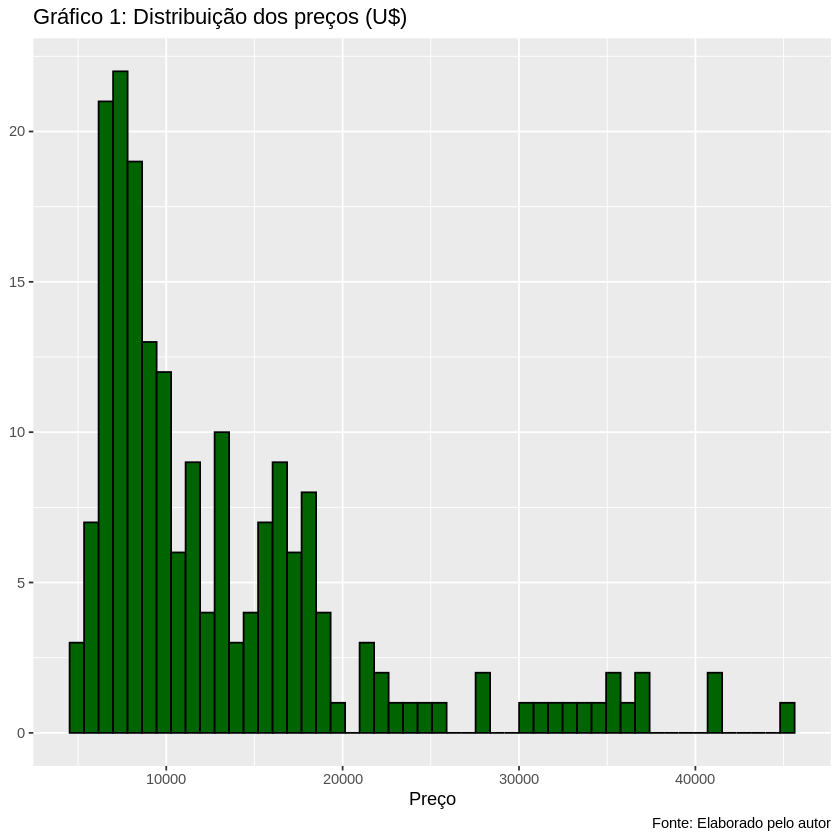

In [60]:
ggplot(autos) +
  geom_histogram(aes(price), bins = 50, fill = 'darkgreen', color = 'black') +
  labs(title = 'Gráfico 1: Distribuição dos preços (U$)', x = 'Preço', y = NULL, caption = "Fonte: Elaborado pelo autor")

A distribuição dos preços apresentada na Figura 2, evidencia que, quanto mais caro o veículo, menos frequente ele é no nosso conjunto de dados.

Warning message:
“Continuous x aesthetic
ℹ did you forget `aes(group = ...)`?”


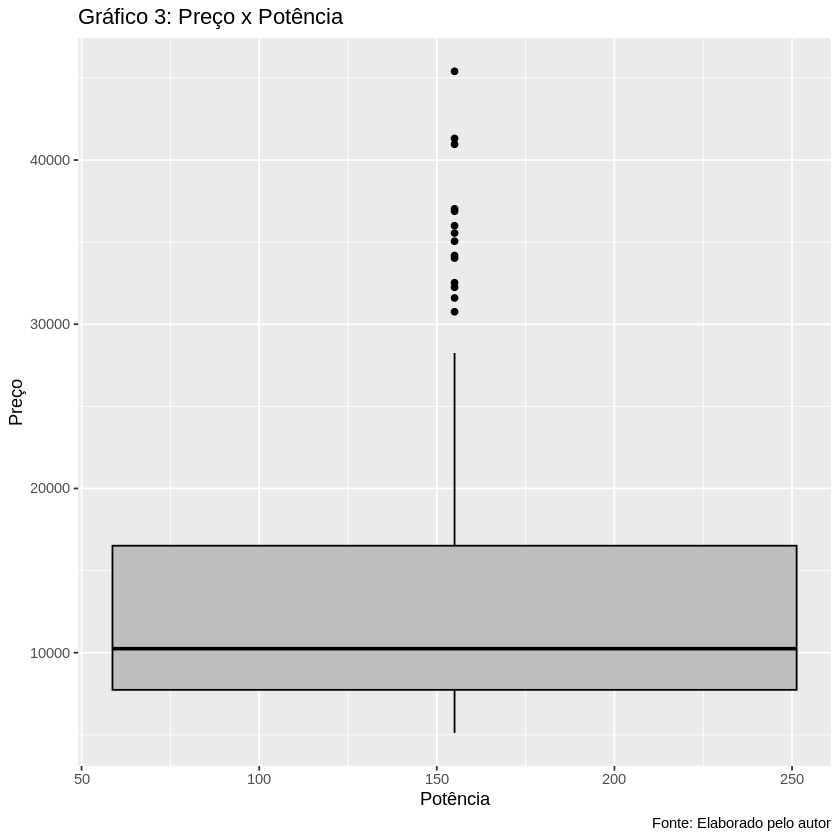

In [62]:
ggplot(autos) +
  geom_boxplot(aes(x = horsepower, y = price), fill = 'gray', color = 'black') +
  labs(title = 'Gráfico 3: Preço x Potência', x = 'Potência', y = 'Preço', caption = "Fonte: Elaborado pelo autor")

O gráfico acima sinaliza valores outliers, ou seja, valores anormais na variável Preço quando relacionado à Potência.

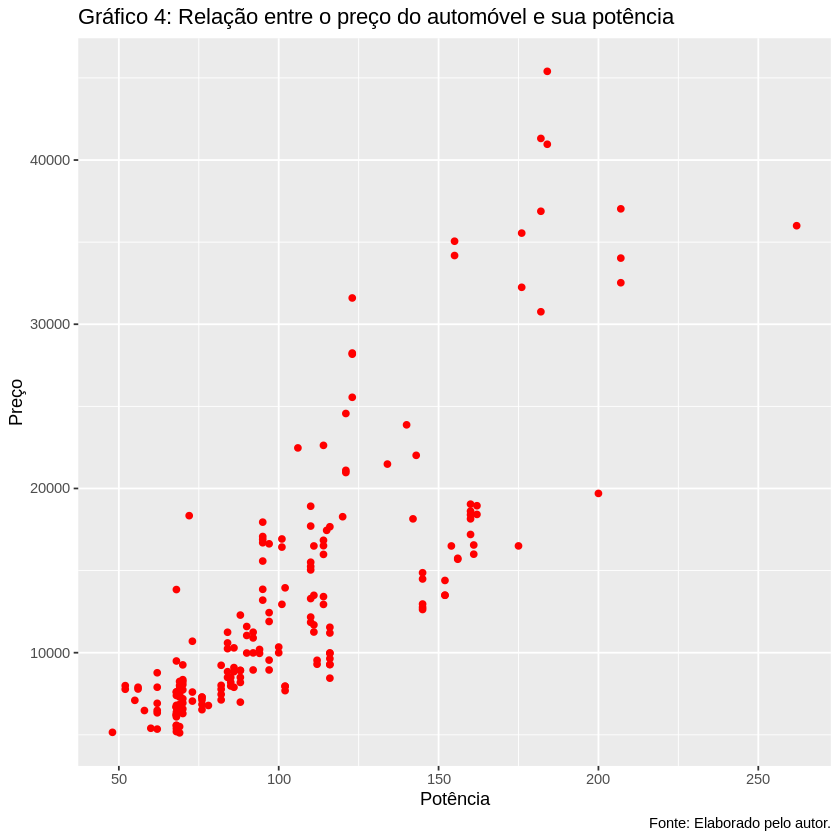

In [63]:
ggplot(autos) +
  geom_point(aes(horsepower, price), color = 'red') +
  labs(title = 'Gráfico 4: Relação entre o preço do automóvel e sua potência', x = 'Potência', y = 'Preço', caption = 'Fonte: Elaborado pelo autor.')

O gráfico de dispersão apresentado no Gráfico 4, mostra uma forte relação crescente entre o preço e a potência dos automóveis, ou seja, quanto maior a potência maior será o preço.

### **Ajustando o modelo aos dados:**

In [64]:
modelo <- lm(price ~ horsepower, autos)
summary(modelo)


Call:
lm(formula = price ~ horsepower, data = autos)

Residuals:
     Min       1Q   Median       3Q      Max 
-10296.1  -2243.5   -450.1   1794.7  18174.9 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4630.70     990.58  -4.675 5.55e-06 ***
horsepower    173.13       8.99  19.259  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4728 on 191 degrees of freedom
Multiple R-squared:  0.6601,	Adjusted R-squared:  0.6583 
F-statistic: 370.9 on 1 and 191 DF,  p-value: < 2.2e-16


- Os resíduos do modelo não indica uma boa simetria e com mediana longe de 0.
- Os coeficientes indicam uma confiabilidade estimada abaixo de 0.05 (P-value), indicando uma boa significância estatística.
- O modelo consegue explicar aproximadamente 65% dos dados.

**Análise de variância do modelo (ANOVA):**

In [65]:
anova(modelo)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
horsepower,1,8292710641,8292710641,370.8973,1.248407e-46
Residuals,191,4270475650,22358511,NA,NA


In [66]:
# Avaliando o F-value
qf(0.95, 1, 191)

[1] 3.890606

Como o F-value é muito maior que o seu valor crítico, é necessário rejeitar a hipótese nula, onde a reta de inclinação é zero.

### **Gráficos diagnósticos do modelo:**

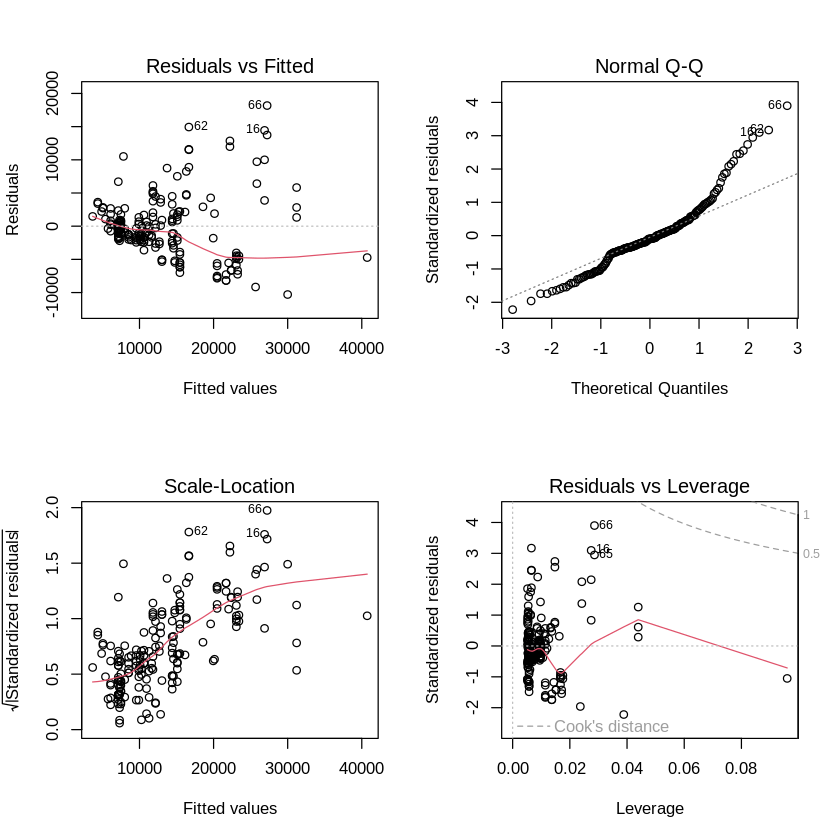

In [67]:
par(mfrow = c(2,2))
plot(modelo)

- Constatamos que não há aleatoriedade na distribuição dos resíduos, os pontos se espalham conforme os valores ajustados ficam maiores.
- Os erros não são normalmente distribuídos, ou seja, apresenta uma discrepância na parte superior e inferior do gráfico Normal Q-Q.
- O modelo não segue o conceito dos míninos quadrados ordinários (OLS).

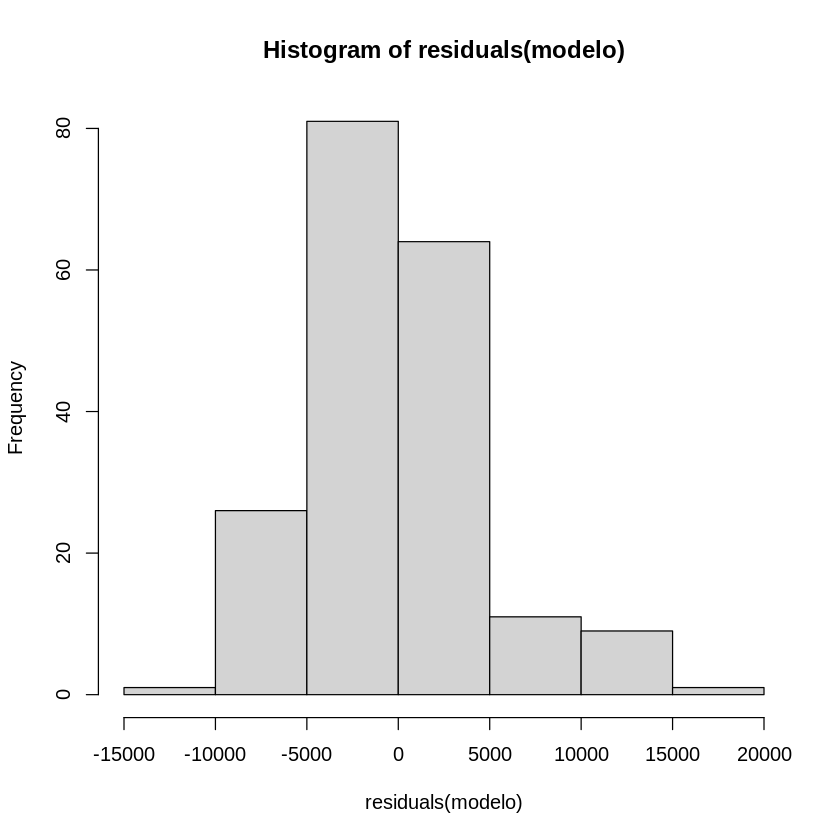

In [68]:
hist(residuals(modelo))

O histograma indica estar próximo de uma distribuição normal nos resíduos.

### **Visualizando a reta de regressão:**

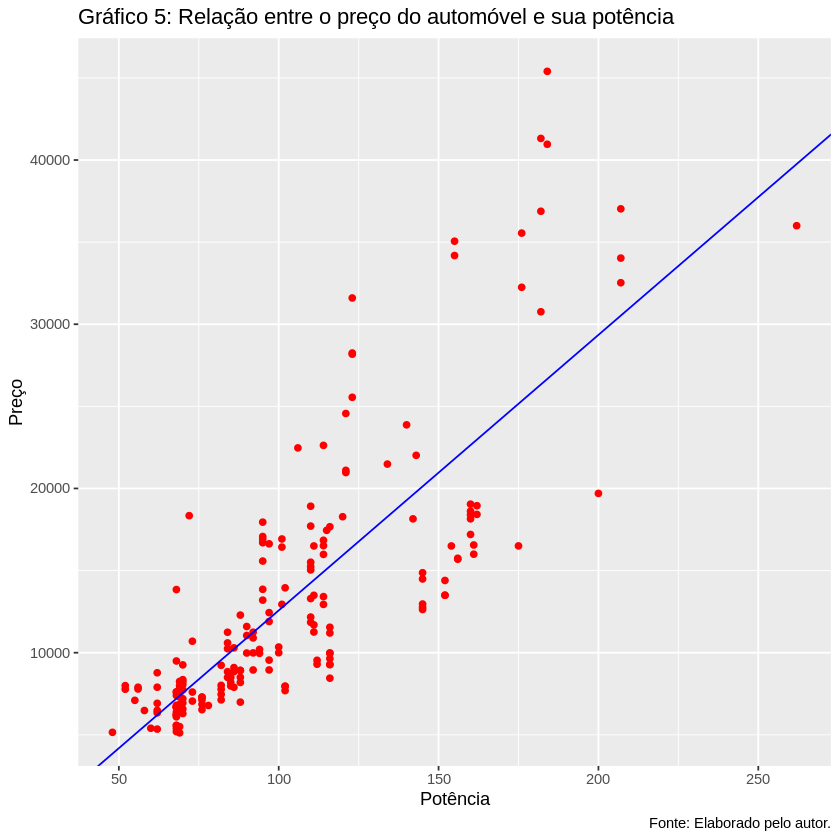

In [69]:
ggplot(autos) +
  geom_point(aes(horsepower, price), color = 'red') +
  labs(title = 'Gráfico 5: Relação entre o preço do automóvel e sua potência', x = 'Potência', y = 'Preço', caption = 'Fonte: Elaborado pelo autor.') +
  geom_abline(intercept = modelo$coefficients[2], slope = modelo$coefficients[2], color = 'blue')

In [71]:
cor(autos$horsepower, autos$price) # r

(cor(autos$horsepower, autos$price) ^ 2) # r^2

[1] 0.8124532

[1] 0.6600802

O Gráfico 5, mostra uma correlação positiva forte entre o preço e a potência, daí o valor de 0.800823140023104. O R-quadrado é o mesmo obtido na regressão linear (Multiple R-squared: 0.6601).